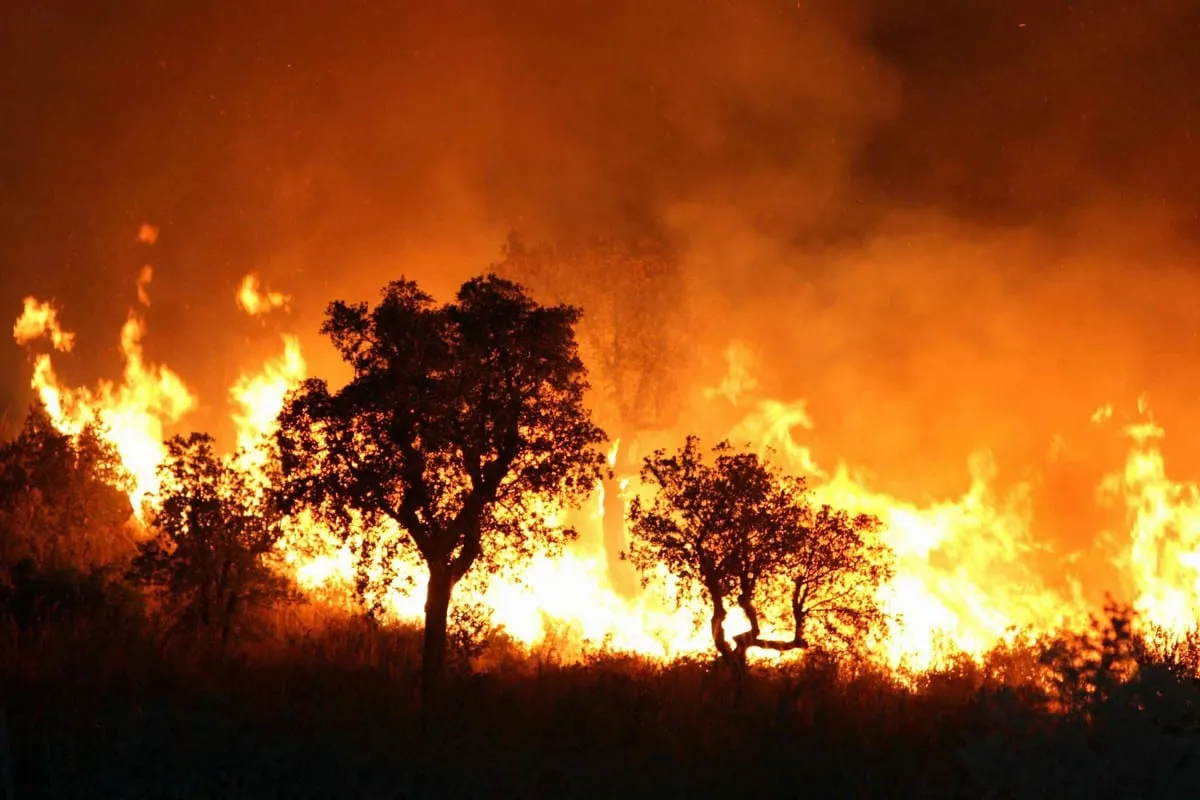

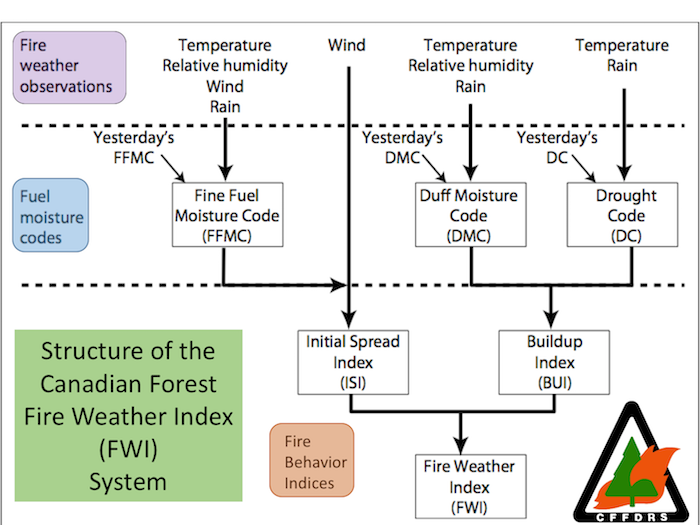

# Forest fire prediction

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

# 1.Problem statement

1. The dataset contains Algerian forest fire details of two regions,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. if user can predict the fire status based on the features 
3. predicted status will help to minimal the damage caused by forest fire 

## 2.Dataset collection

This data is collect from the uci machine learning repository

###  importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as req
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import cufflinks as cf
cf.go_offline()

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Collect the data

In [2]:
directory='./data/'

download_url='https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'

filename=os.path.basename(download_url)

os.makedirs(directory,exist_ok=True)

download_file_path = os.path.join(directory, filename)

req.urlretrieve(download_url,download_file_path)

df=pd.read_csv(download_file_path,header=1)

### display top5 records of dataframe

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### display last5 records of dataframe

In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


## let's check for the shape of dataset

In [5]:
df.shape

(246, 14)

- There are 244 rows and 15 columns

## Data set information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
        
FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

### dataset has a duplicate header and region row which needs to be handled

In [6]:
df[ (df['day'] == 'Sidi-Bel Abbes Region Dataset') | (df['day']=='day')]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [7]:
df.loc[121:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


## drop two rows and reset the index

In [8]:
df.drop([122,123],inplace=True)

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df.loc[121:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


### Add an extra column to denote regions 
* Bejaia region = 1
* Sidi-Bel Abbes Region = 2

In [11]:
df['Region']=np.where(df.index <= 121,1,2)

In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

## column name contains space need to remove the spaces from columns

In [13]:
df.columns=df.columns.str.strip()

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
## Datatype information
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

- Except classes and region rest all the columns are numerical type.
- Numerical inturn is divided into continuous and discrete 
- convert the dtype and seperate discrete, continuous and categorical data for univariate analysis

### Look for null values in dataset

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

- only classes has on null value, which need to be handled 

In [17]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,2


In [18]:
# 165 row is wrongly captured data remove the row
df.drop(165,inplace=True)
df.reset_index(drop=True,inplace=True)

In [19]:
df.loc[163:167]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
163,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire,2
164,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,2
165,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,2
166,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire,2
167,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire,2


In [20]:
df['Classes'].isnull().sum()

0

- There are no null values in our dataset

## check for unique values for categorical data

In [21]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

- Even though there are only two classes due to spacing classes are showing multiple
- Removing spaces from the classes

In [22]:
df['Classes']=df.Classes.str.strip()

In [23]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

## Since the entire dataset is captured for 2012 we can drop the year column

In [24]:
df.drop('year',axis=1,inplace=True)

In [25]:
df.shape

(243, 14)

In [26]:
# collect features to be converted
num_features=[ features for features in df.columns if features not in ['Classes','Region']]
num_features

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [27]:
for i in num_features:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [28]:
df.dtypes

day              int64
month            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [29]:
# check for duplicates
df.duplicated().sum()

0

- There are no duplicates

In [30]:
# check for unique values count in numerical data
for i in num_features:
    print('{} has {} unique values'.format(i,df[i].nunique()))

day has 31 unique values
month has 4 unique values
Temperature has 19 unique values
RH has 62 unique values
Ws has 18 unique values
Rain has 39 unique values
FFMC has 173 unique values
DMC has 165 unique values
DC has 197 unique values
ISI has 106 unique values
BUI has 173 unique values
FWI has 125 unique values


### Distinguish discrete, continuous numerical feature and categorical feature

In [31]:
discrete_features=[ feature for feature in num_features if df[feature].nunique() <= 40]

In [32]:
continuous_feature=list(set(num_features)-set(discrete_features))

In [33]:
discrete_features

['day', 'month', 'Temperature', 'Ws', 'Rain']

In [34]:
continuous_feature

['ISI', 'FWI', 'BUI', 'FFMC', 'RH', 'DC', 'DMC']

In [35]:
categorical_feature=['Classes','Region']

In [36]:
## check for memory size in kb
np.round((df.memory_usage())/1024,2)

Index          0.12
day            1.90
month          1.90
Temperature    1.90
RH             1.90
Ws             1.90
Rain           1.90
FFMC           1.90
DMC            1.90
DC             1.90
ISI            1.90
BUI            1.90
FWI            1.90
Classes        1.90
Region         0.95
dtype: float64

## Statistical analysis

In [37]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,243.0,NaN,NaN,NaN,15.761317,8.842552,1.0,8.0,16.0,23.0,31.0
month,243.0,NaN,NaN,NaN,7.502058,1.114793,6.0,7.0,8.0,8.0,9.0
Temperature,243.0,NaN,NaN,NaN,32.152263,3.628039,22.0,30.0,32.0,35.0,42.0
RH,243.0,NaN,NaN,NaN,62.041152,14.82816,21.0,52.5,63.0,73.5,90.0
Ws,243.0,NaN,NaN,NaN,15.493827,2.811385,6.0,14.0,15.0,17.0,29.0
Rain,243.0,NaN,NaN,NaN,0.762963,2.003207,0.0,0.0,0.0,0.5,16.8
FFMC,243.0,NaN,NaN,NaN,77.842387,14.349641,28.6,71.85,83.3,88.3,96.0
DMC,243.0,NaN,NaN,NaN,14.680658,12.39304,0.7,5.8,11.3,20.8,65.9
DC,243.0,NaN,NaN,NaN,49.430864,47.665606,6.9,12.35,33.1,69.1,220.4
ISI,243.0,NaN,NaN,NaN,4.742387,4.154234,0.0,1.4,3.5,7.25,19.0


- fire category is more than not fire 
- maximum temperature is 42 and minimum is 22
- Rain data may have lot of outliers 

In [38]:
# check correlation greater than 94% in both directions
(df.corr() > 0.90) | (df.corr() < -0.90)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,True,False,False,False,False,False,False,False,False,False,False,False,False
month,False,True,False,False,False,False,False,False,False,False,False,False,False
Temperature,False,False,True,False,False,False,False,False,False,False,False,False,False
RH,False,False,False,True,False,False,False,False,False,False,False,False,False
Ws,False,False,False,False,True,False,False,False,False,False,False,False,False
Rain,False,False,False,False,False,True,False,False,False,False,False,False,False
FFMC,False,False,False,False,False,False,True,False,False,False,False,False,False
DMC,False,False,False,False,False,False,False,True,False,False,True,False,False
DC,False,False,False,False,False,False,False,False,True,False,True,False,False
ISI,False,False,False,False,False,False,False,False,False,True,False,True,False


- BUI and DMC are highly correlated
- BUI and DC are highly correlated
- ISI and FWI 

## Univariate analysis

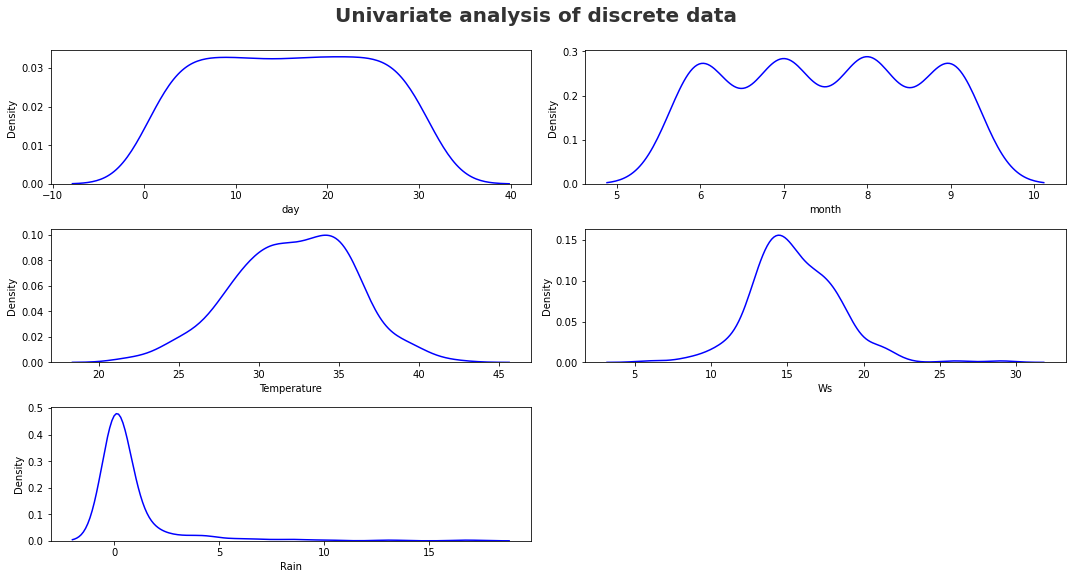

In [39]:
#discrete features
j=1
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of discrete data',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for feat in discrete_features:
    plt.subplot(6,2,j)
    sns.distplot(df[feat],color='b',hist=False)
    plt.xlabel(feat)
    j+=1
    plt.tight_layout()
    

- Rain is highly +ve skewed 

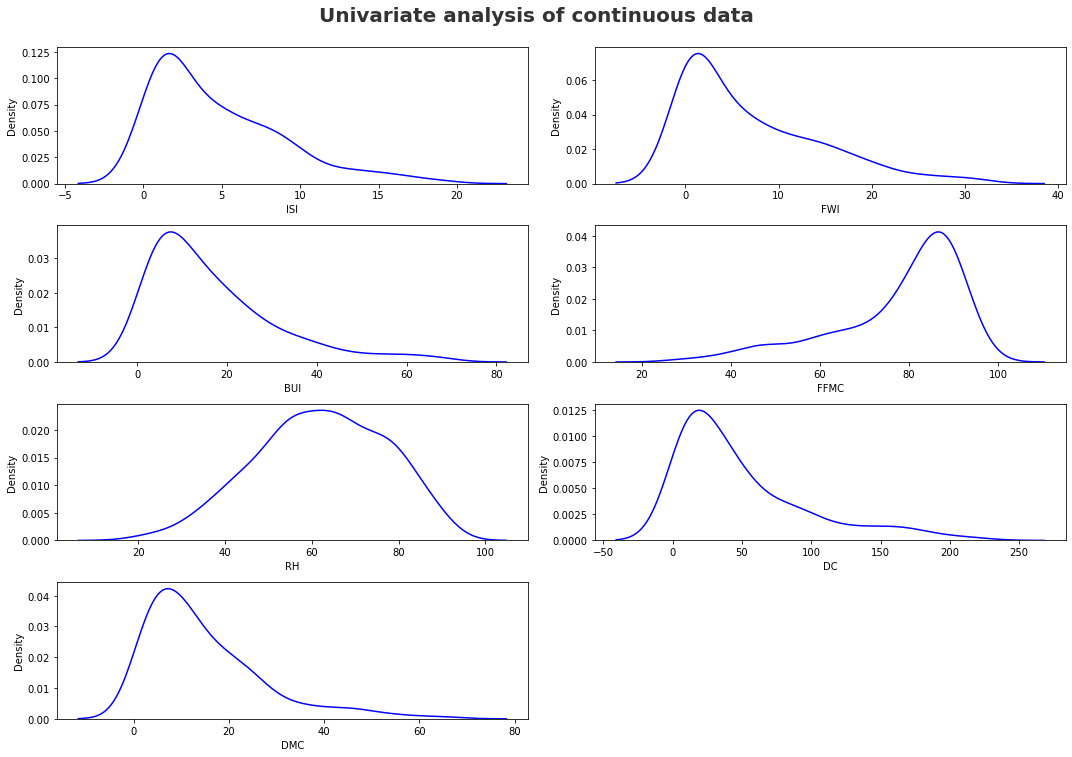

In [40]:
j=1
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of continuous data',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for feat in continuous_feature:
    plt.subplot(6,2,j)
    sns.distplot(df[feat],color='b',hist=False)
    plt.xlabel(feat)
    j+=1
    plt.tight_layout()

- DMC,FWI,DC,ISI,BUI are +ve skewed
- FFMC -ve skewed

In [41]:
df.skew()

day            0.000365
month         -0.005207
Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
Region         0.008282
dtype: float64

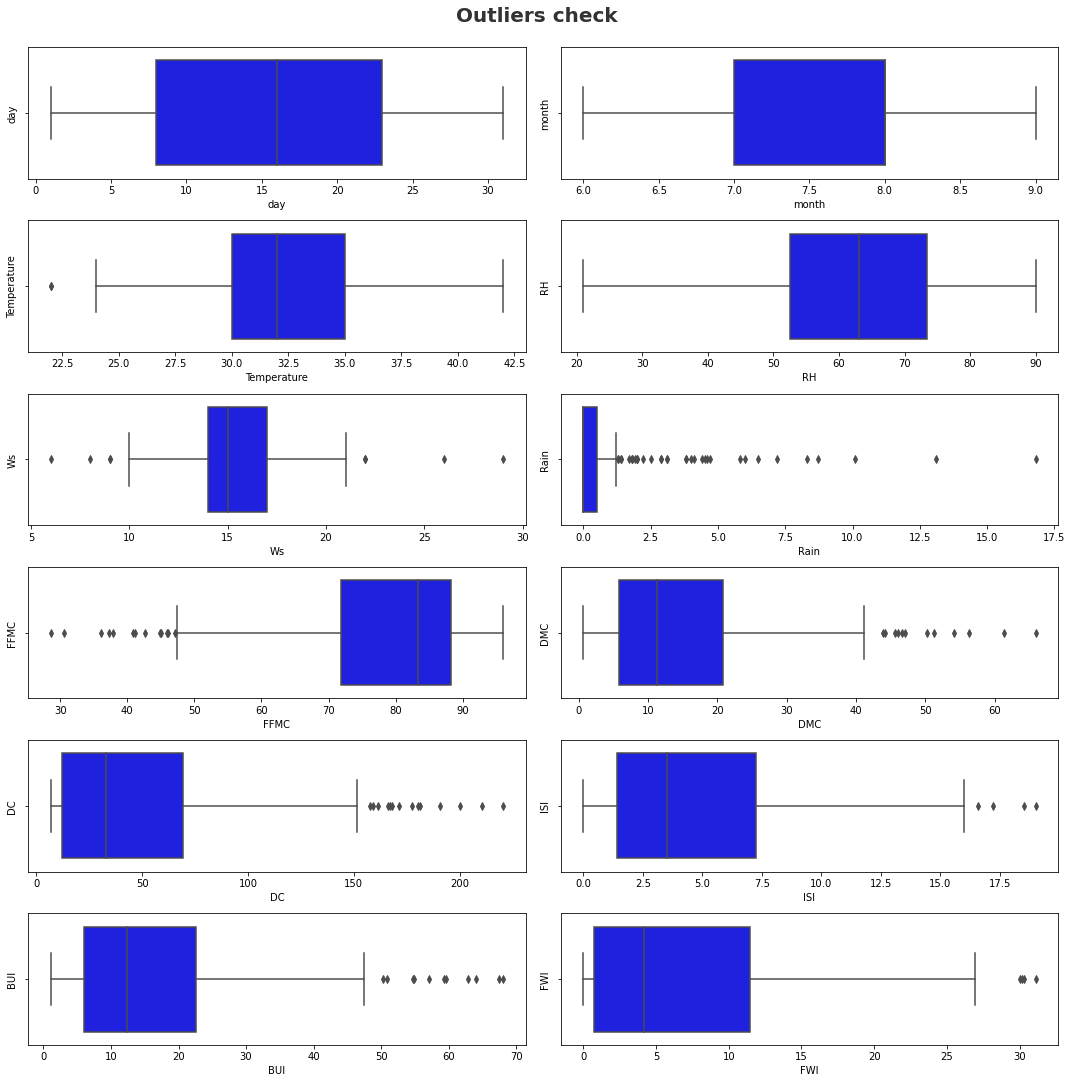

In [42]:
j=1
plt.figure(figsize=(15,15))
plt.suptitle('Outliers check',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for feat in num_features:
    plt.subplot(6,2,j)
    sns.boxplot(df[feat],color='b')
    plt.ylabel(feat)
    j+=1
    plt.tight_layout()

- Rain has more no.of outliers

## Bivariate analysis

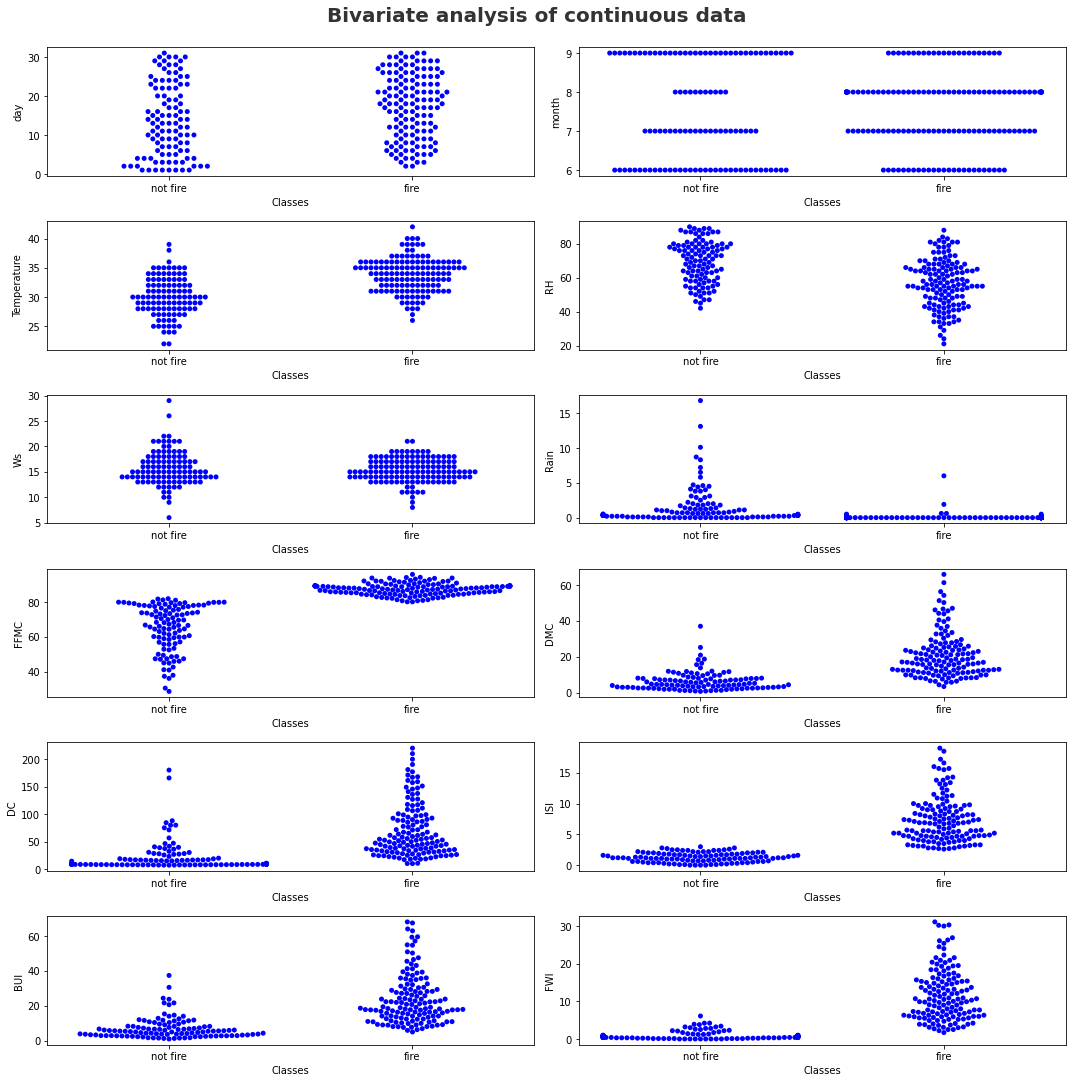

In [43]:
j=1
plt.figure(figsize=(15,15))
plt.suptitle('Bivariate analysis of continuous data',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for feat in num_features:
    plt.subplot(6,2,j)
    sns.swarmplot(df['Classes'],df[feat],color='b')
    plt.ylabel(feat)
    j+=1
    plt.tight_layout()

- Fire occured mostly in july,august months
- when temperature is 35,36 fire occured more frequently

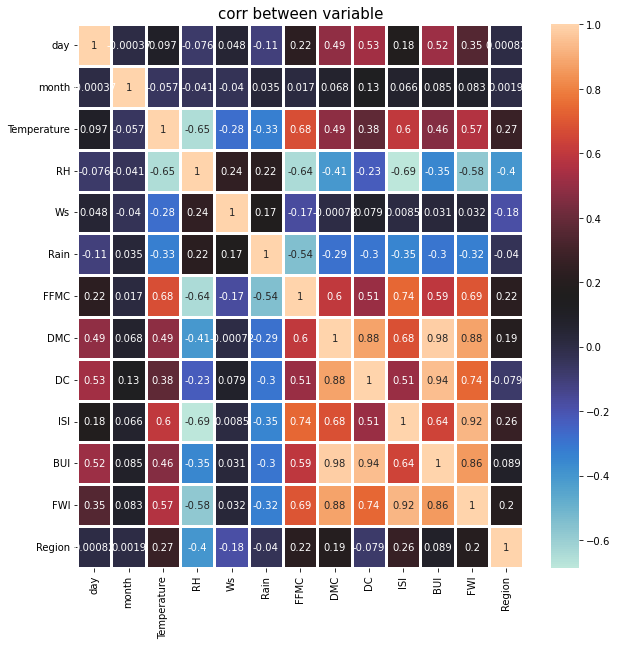

In [44]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

- ISI , FWI are 92% correlated
- DC,BUI are 94% correlated
- DMC,BUI are 98% correlated

<AxesSubplot:xlabel='Temperature', ylabel='RH'>

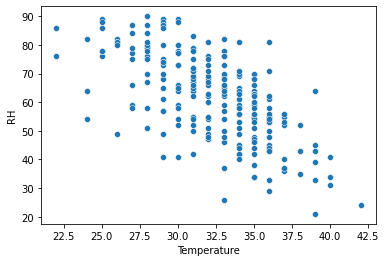

In [45]:
# Relative humidity vs Temperature
sns.scatterplot(x="Temperature",y='RH',data=df)

<AxesSubplot:xlabel='Temperature', ylabel='Ws'>

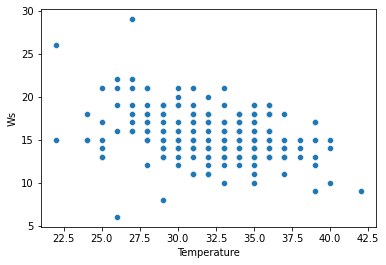

In [46]:
#Temperature vs Ws
sns.scatterplot(x="Temperature",y='Ws',data=df)

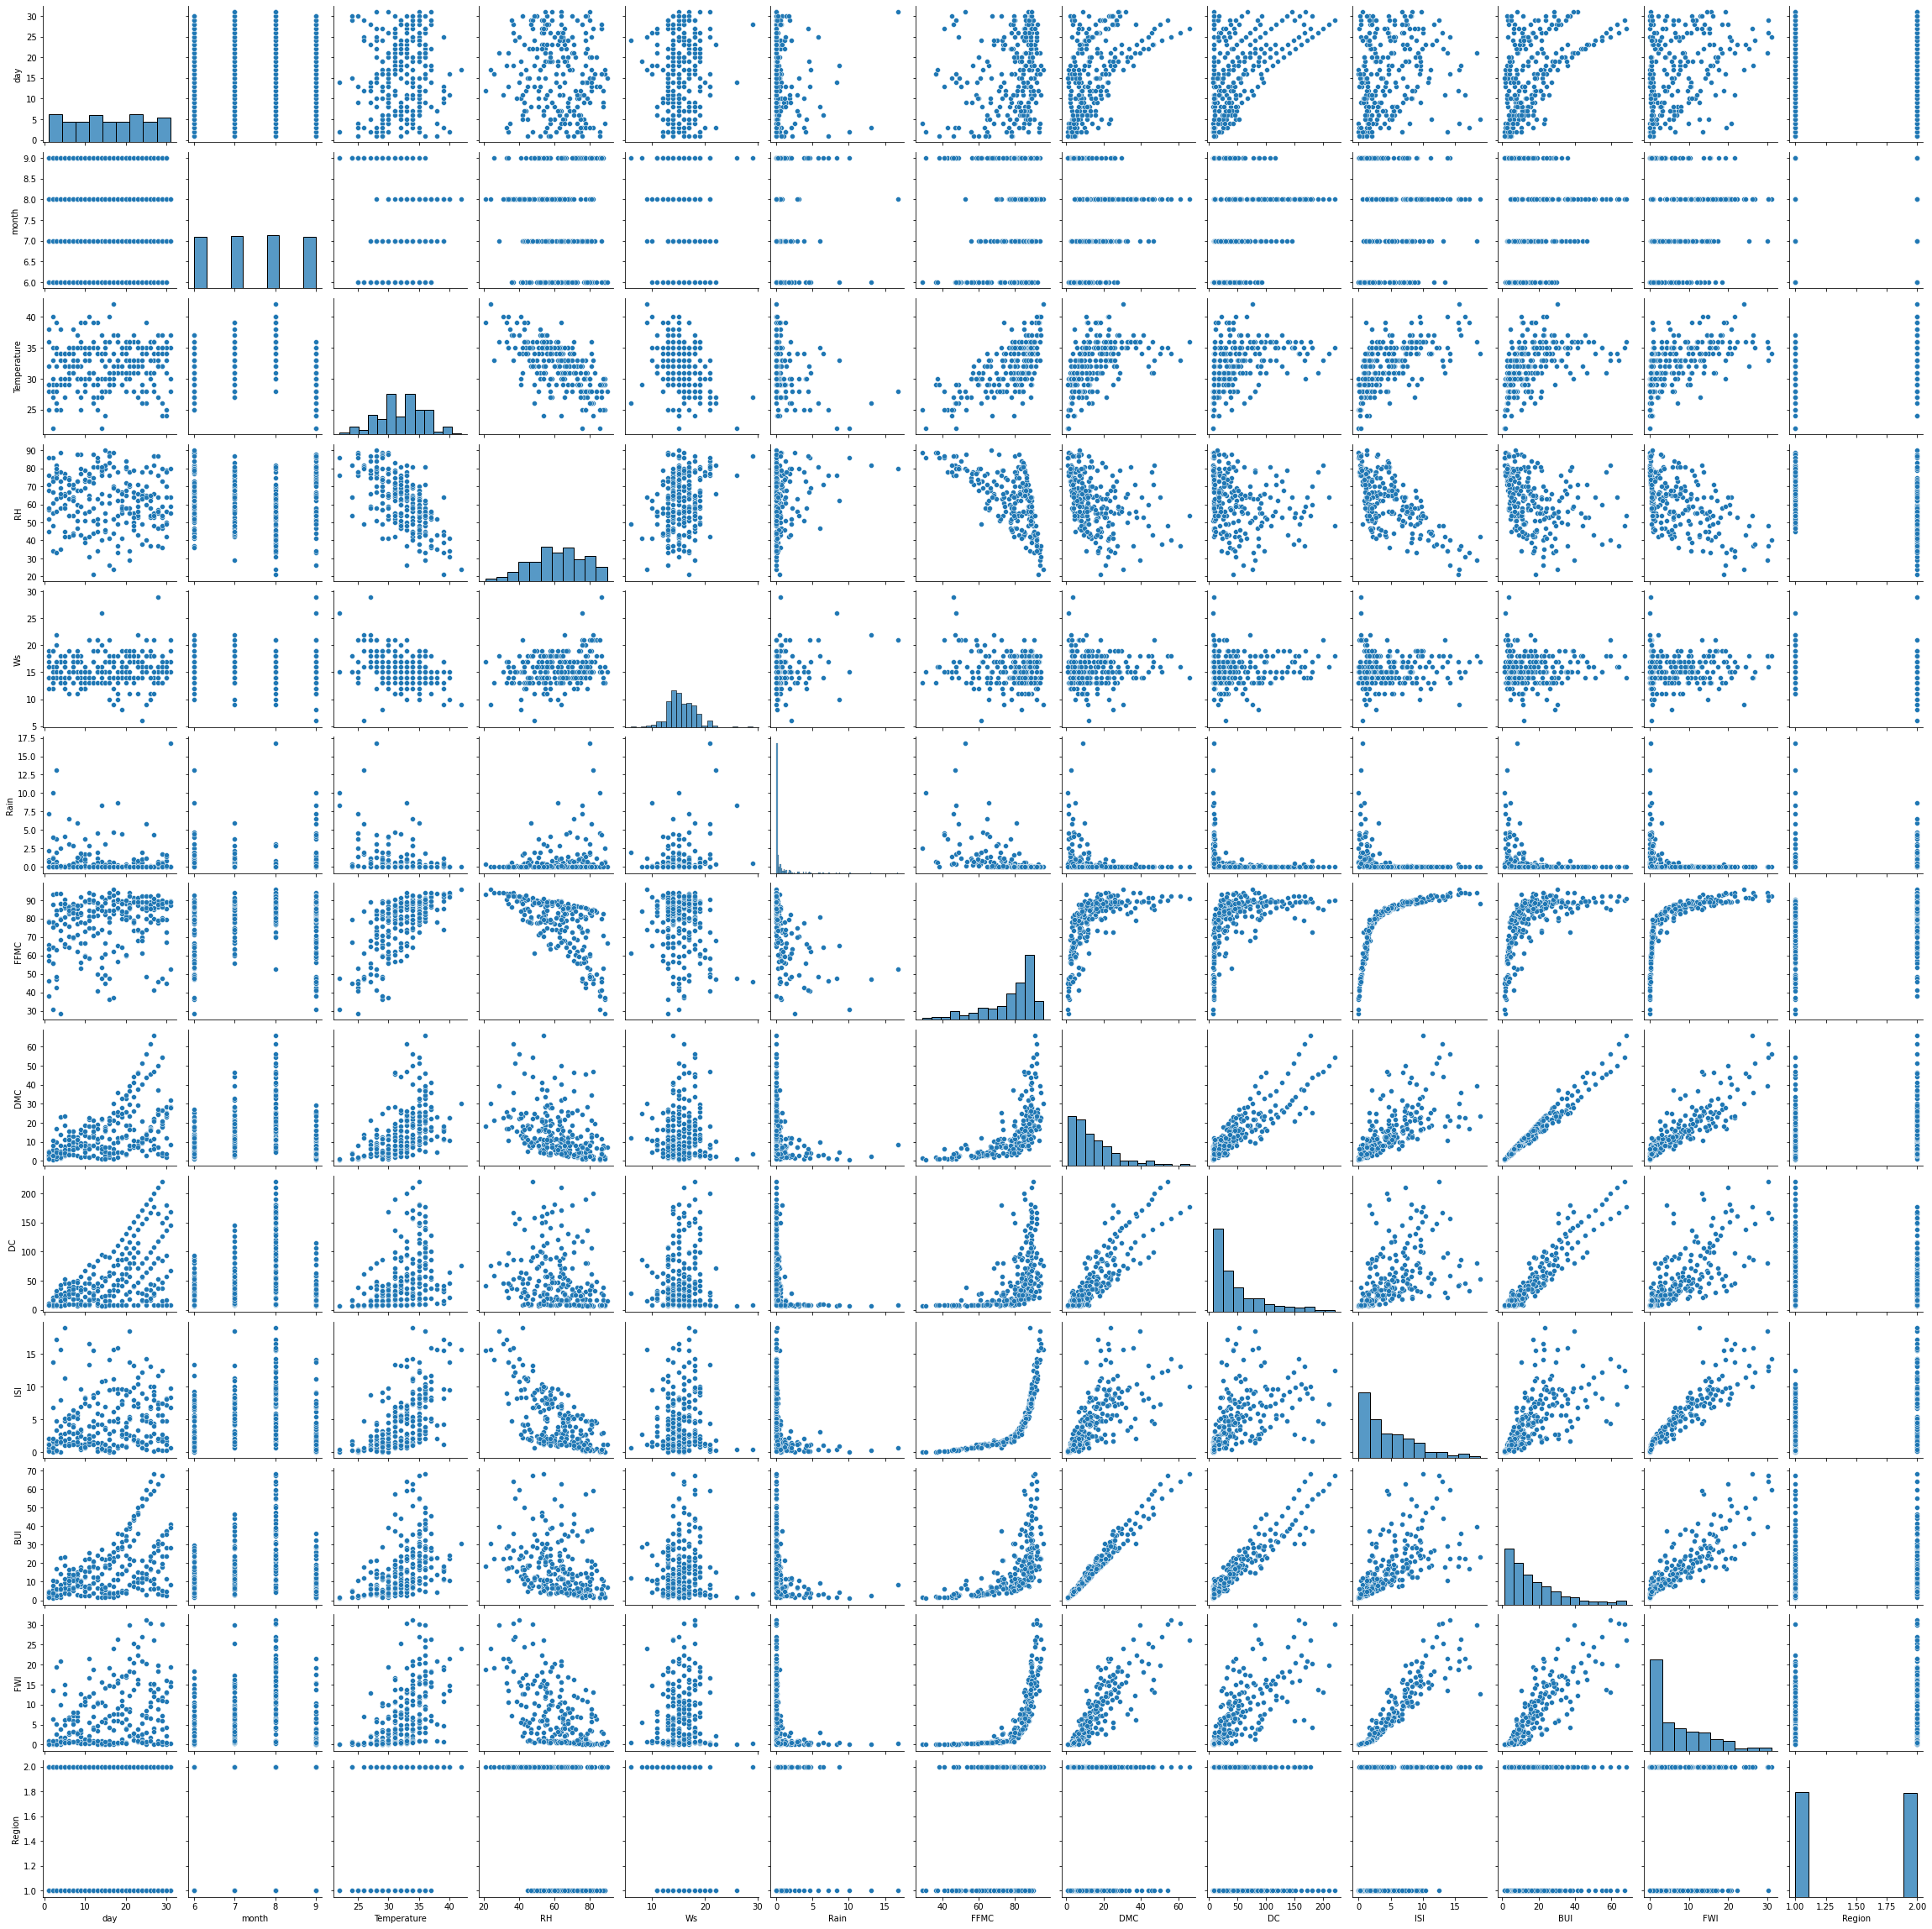

In [47]:
sns.pairplot(df)

<AxesSubplot:xlabel='Classes'>

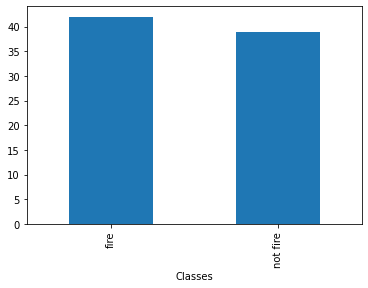

In [48]:
#Highest temperature during fire.not fire
df.groupby('Classes')['Temperature'].max().plot.bar()

- highest temperature during fire condition is 42

<AxesSubplot:xlabel='Classes', ylabel='count'>

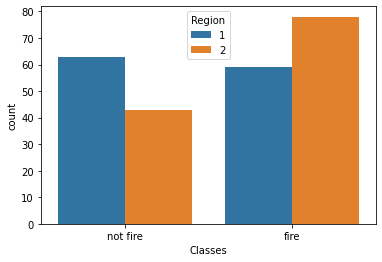

In [49]:
# which region fire is is high
sns.countplot(x=df['Classes'],hue=df['Region'])


- Sidi Bel-abbes region is most affected by fire

In [50]:
df.groupby('Classes')['Rain'].max()

Classes
fire         6.0
not fire    16.8
Name: Rain, dtype: float64

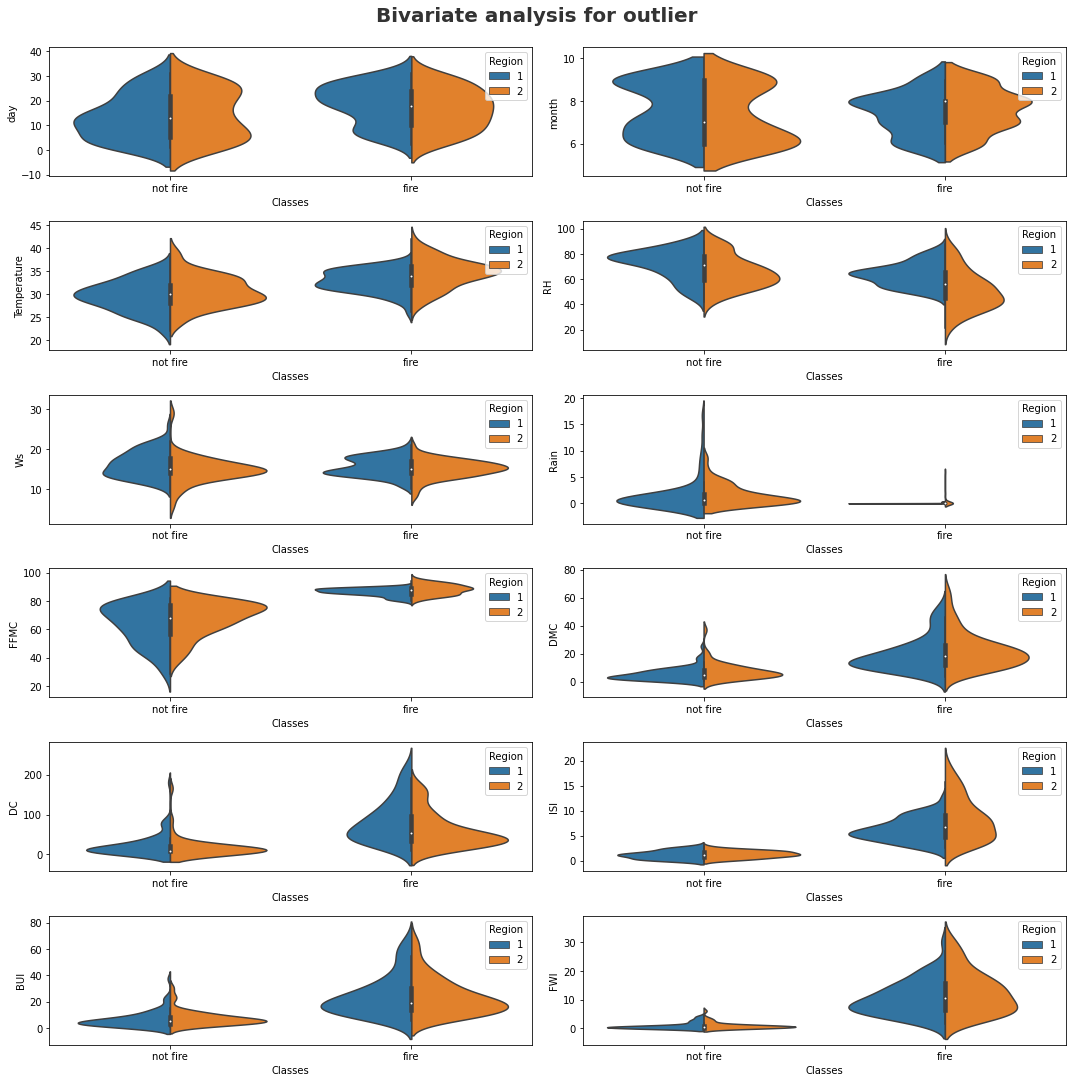

In [51]:
#box plot to check outliers
j=1
plt.figure(figsize=(15,15))
plt.suptitle('Bivariate analysis for outlier',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for feat in num_features:
    plt.subplot(6,2,j)
    sns.violinplot(df['Classes'],df[feat],hue=df['Region'],split=True)
    plt.ylabel(feat)
    j+=1
    plt.tight_layout()

- Rain humidity during fire has high dispersion in region 2 compared to region 1
- Rain is minimal during fire in both the regions

<AxesSubplot:ylabel='Classes'>

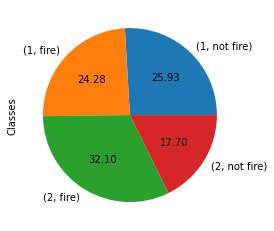

In [52]:
df.groupby('Region')['Classes'].value_counts().plot.pie(autopct='%.2f')


- Region 2 is most affected with fire compared to region 1

In [53]:
import plotly.express as px
fig = px.sunburst(df, path=['Classes','Region',], values='Temperature',
                  color='Rain')
fig.show()

- region 2 encountered higher rainfall than region 1 for both fire and not fire

In [54]:
df.sample(10)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
91,31,8,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire,1
107,16,9,30,65,14,0.0,78.1,3.2,15.7,1.9,4.2,0.8,not fire,1
119,28,9,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
150,29,6,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2,fire,2
60,31,7,35,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,fire,1
182,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,not fire,2
181,31,7,37,55,15,0.0,89.3,28.3,67.2,8.3,28.3,14.5,fire,2
139,18,6,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4,not fire,2
193,12,8,39,21,17,0.4,93.0,18.4,41.5,15.5,18.4,18.8,fire,2
198,17,8,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,fire,2


In [55]:
df_Bejaia=df[df['Region']==1]

<AxesSubplot:xlabel='month', ylabel='count'>

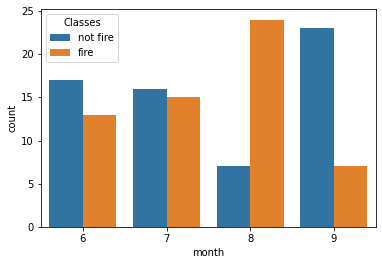

In [56]:
sns.countplot(x='month',data=df_Bejaia,hue='Classes')

- In Bejajia region fire occured frequently in August

<AxesSubplot:xlabel='Ws', ylabel='Density'>

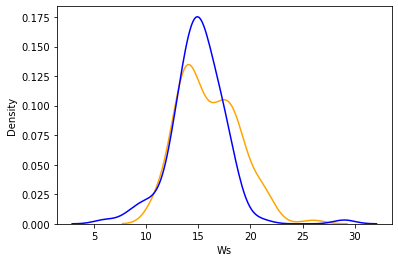

In [57]:
sns.distplot(df[df['Region']==1]['Ws'],hist=False,color='orange')
sns.distplot(df[df['Region']==2]['Ws'],hist=False,color='b')

- Region 2 has high wind speed when compared to region 1

In [58]:
df_SidiBel_abbes=df[df['Region']==2]

<AxesSubplot:xlabel='month', ylabel='count'>

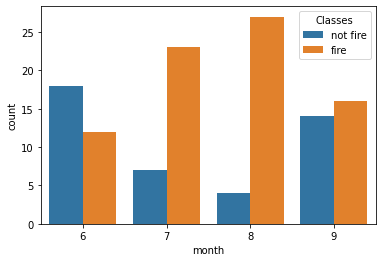

In [59]:
sns.countplot(x='month',data=df_SidiBel_abbes,hue='Classes')

- in Sidi Bel_abbes region july amd august are mostly affected by fire

## Final report

- There are no duplicates and null values in dataset
- BUI , DMC and DC has multicolinearity
- FWI components doesn't follow normal distribution and has outliers
- Rain is highly positive skewed with lot of outliers
- Temperature and Ws has very few outliers
- when temperature is 35,36 fire occured more frequently
- highest temperature during fire condition is 42
- Sidi Bel-abbes region is most affected by fire and fire occured most frequently in july and August months
- Region 2 encountered higher rainfall than region 1 in both fire and not fire situations
- Region 2 has high wind speed when compared to region 1

In [60]:
df.to_csv('./data/Algerian_cleaned.csv')

# Pre Processing

In [61]:
data_preprocess=pd.read_csv('./data/Algerian_cleaned.csv',usecols=[i for i in range(1,15)])

In [62]:
data_preprocess.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [63]:
#drop date as it not so important feature for prediction
data_preprocess.drop('day',axis=1,inplace=True)

In [64]:
data_preprocess.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [65]:
#label encode the target variable

In [66]:
encode=LabelEncoder()

In [67]:
d=encode.fit_transform(data_preprocess['Classes'])

In [68]:
data_preprocess['Fire_status']=d

In [69]:
data_preprocess.drop('Classes',axis=1,inplace=True)

In [70]:
data_preprocess.sample(5)

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Fire_status
227,9,32,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,2,0
36,7,35,64,18,0.2,80.0,9.7,40.4,2.8,12.1,3.2,1,1
33,7,33,78,17,0.0,80.1,4.6,18.5,2.7,5.7,1.7,1,1
168,7,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,2,0
48,7,35,59,17,0.0,88.1,12.0,52.8,7.7,18.2,10.9,1,0


In [71]:
x_train,x_test,y_train,y_test=train_test_split(data_preprocess.iloc[:,0:12],data_preprocess.iloc[:,-1],test_size=0.30,random_state=42)

In [72]:
y_train.head()

29     0
120    1
114    1
241    1
5      0
Name: Fire_status, dtype: int32

In [73]:
x_train.drop(['BUI','FWI'],axis=1,inplace=True)
x_test.drop(['BUI','FWI'],axis=1,inplace=True)

In [74]:
x_train.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Region
29,6,33,50,14,0.0,88.7,22.9,92.8,7.2,1
120,9,26,80,16,1.8,47.4,2.9,7.7,0.3,1
114,9,32,54,11,0.5,73.7,7.9,30.4,1.2,1
241,9,24,54,18,0.1,79.7,4.3,15.2,1.7,2
5,6,31,67,14,0.0,82.6,5.8,22.2,3.1,1


In [75]:
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()

In [76]:
x_train=scale.fit_transform(x_train)

In [77]:
x_test=scale.transform(x_test)

In [78]:
# Model designing

In [79]:
from sklearn.linear_model import LogisticRegression

In [81]:
logistic=LogisticRegression()

In [82]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [83]:
predict=logistic.predict(x_test)

In [84]:
predict

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0])

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [93]:
cm=confusion_matrix(y_test,predict)
cm

array([[43,  1],
       [ 2, 27]], dtype=int64)

In [92]:
accuracy_score(y_test,predict)

0.958904109589041

In [98]:
precision = cm[0][0]/(cm[0][0]+cm[0][1])
precision

0.9772727272727273

In [99]:
recall=cm[0][0]/(cm[0][0]+cm[1][0])
recall

0.9555555555555556

In [100]:
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.9662921348314608

In [101]:
logistic.coef_

array([[ 0.03228013, -0.23804439, -0.22256054,  0.0279939 , -0.02124648,
        -3.03009691, -0.62335232, -0.54133685, -2.76911427, -0.1662665 ]])